# Modelling Cervical Cancer :

Cervical cancer is one of the leading causes of cancer-related deaths among women worldwide. Early detection and accurate prediction of cervical cancer can significantly improve the chances of successful treatment and save lives. This project aims to develop a predictive model using machine learning techniques to identify individuals at high risk of cervical cancer, allowing for timely intervention and medical care.

The main objective of this project is to build a robust machine learning model that can predict the likelihood of cervical cancer based on relevant features and patient data. By analyzing a dataset of cervical cancer cases, the model will learn patterns and correlations to make accurate predictions, enabling healthcare professionals to identify high-risk patients.

## Import Libraries :¶
These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing Dataset :
The dataset contains various patient attributes, including demographic data, sexual behavior, smoking habits, contraceptive usage, history of sexually transmitted diseases (STDs), and diagnostic outcomes related to cervical cancer. These attributes will be used to develop a machine learning model for predicting the risk of cervical cancer, facilitating early detection and timely intervention.

In [62]:
Data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\cancer_cervical.csv")

In [21]:
Data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


## Exploratory Data Analysis


Exploratory Data Analysis (EDA) for the cervical cancer dataset involves summarizing key statistics, visualizing data distributions, and identifying relationships between variables. This includes handling missing data, analyzing target variable distribution, checking for class imbalances, and detecting outliers. Correlation analysis helps understand feature relationships, and feature importance techniques can identify influential predictors. EDA insights guide data preprocessing steps like feature scaling and encoding, preparing the dataset for building a predictive model to identify cervical cancer risk accurately.

In [22]:
Data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [23]:
Data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
963,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
964,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
965,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
966,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0
967,29,2,20,1,0,0,0,1,0.5,0,...,?,?,0,0,0,0,0,0,0,0


In [24]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 968 non-null    int64 
 1   Number of sexual partners           968 non-null    object
 2   First sexual intercourse            968 non-null    object
 3   Num of pregnancies                  968 non-null    object
 4   Smokes                              968 non-null    object
 5   Smokes (years)                      968 non-null    object
 6   Smokes (packs/year)                 968 non-null    object
 7   Hormonal Contraceptives             968 non-null    object
 8   Hormonal Contraceptives (years)     968 non-null    object
 9   IUD                                 968 non-null    object
 10  IUD (years)                         968 non-null    object
 11  STDs                                968 non-null    object

In [30]:
Data.isnull().sum()

Age                                     0
Number of sexual partners              29
First sexual intercourse               10
Num of pregnancies                     70
Smokes                                 16
Smokes (years)                         16
Smokes (packs/year)                    16
Hormonal Contraceptives               122
Hormonal Contraceptives (years)       122
IUD                                   133
IUD (years)                           133
STDs                                  122
STDs (number)                         122
STDs:condylomatosis                   122
STDs:cervical condylomatosis          122
STDs:vaginal condylomatosis           122
STDs:vulvo-perineal condylomatosis    122
STDs:syphilis                         122
STDs:pelvic inflammatory disease      122
STDs:genital herpes                   122
STDs:molluscum contagiosum            122
STDs:AIDS                             122
STDs:HIV                              122
STDs:Hepatitis B                  

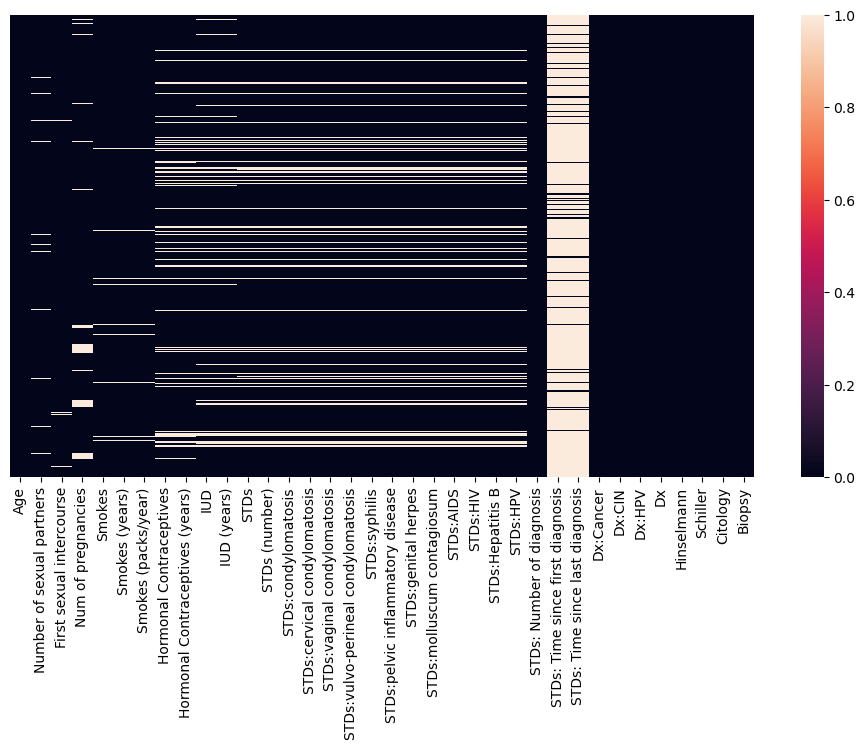

In [31]:
plt.figure(figsize = (12, 6))
sns.heatmap(Data.isna(), yticklabels = False)
plt.show()

In [27]:
Data = Data.replace('?', np.nan)

In [28]:
Data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [32]:
Data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,968.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,26.880165,0.085744,0.024793,0.011364,0.02376,0.032025,0.039256,0.083678,0.051653,0.063017
std,8.375871,0.298017,0.155575,0.106048,0.15238,0.176157,0.194304,0.277047,0.221440,0.243118
min,13.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
Data.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_14456\2267807100.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.mean()


Age                          26.880165
STDs: Number of diagnosis     0.085744
Dx:Cancer                     0.024793
Dx:CIN                        0.011364
Dx:HPV                        0.023760
Dx                            0.032025
Hinselmann                    0.039256
Schiller                      0.083678
Citology                      0.051653
Biopsy                        0.063017
dtype: float64

In [34]:
Data  = Data.fillna(Data.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_14456\3665187442.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data  = Data.fillna(Data.mean())


In [35]:
Data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [37]:
Data.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

In [39]:
Data.dropna()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
21,41,3,17,4,0,0,0,1,10,0,...,21,21,0,0,0,0,0,0,0,0
22,40,1,18,1,0,0,0,1,0.25,0,...,2,2,0,0,0,0,0,1,1,1
59,35,3,17,4,0,0,0,1,7,1,...,19,19,0,0,0,0,0,0,0,0
68,35,3,20,2,0,0,0,0,0,1,...,3,3,0,0,0,0,0,0,0,0
78,35,3,17,6,1,13,2.6,1,7,0,...,12,12,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,25,6,17,2,0,0,0,1,2,0,...,4,4,0,0,0,0,0,1,1,1
899,20,1,18,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
932,36,3,20,2,0,0,0,1,6,0,...,16,16,1,0,1,1,0,0,0,0
936,33,4,17,0,0,0,0,1,0.75,0,...,11,11,0,0,0,0,0,0,0,0


## Statical Info:

Statistical information in the Exploratory Data Analysis (EDA) of the cervical cancer dataset includes calculating summary statistics like mean, median, and standard deviation for numerical attributes. Visualization of data distributions through histograms and kernel density plots provides insights into data spread. Frequency distribution of categorical variables reveals the distribution of different categories.

In [40]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,968.0,26.880165,8.375871,13.0,20.0,26.0,32.0,84.0
STDs: Number of diagnosis,968.0,0.085744,0.298017,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,968.0,0.024793,0.155575,0.0,0.0,0.0,0.0,1.0
Dx:CIN,968.0,0.011364,0.106048,0.0,0.0,0.0,0.0,1.0
Dx:HPV,968.0,0.023760,0.152380,0.0,0.0,0.0,0.0,1.0
Dx,968.0,0.032025,0.176157,0.0,0.0,0.0,0.0,1.0
Hinselmann,968.0,0.039256,0.194304,0.0,0.0,0.0,0.0,1.0
Schiller,968.0,0.083678,0.277047,0.0,0.0,0.0,0.0,1.0
Citology,968.0,0.051653,0.221440,0.0,0.0,0.0,0.0,1.0
Biopsy,968.0,0.063017,0.243118,0.0,0.0,0.0,0.0,1.0


## Correlation Matrix :


A correlation matrix is a square matrix showing the correlation coefficients between pairs of numerical variables in the cervical cancer dataset. It helps reveal the strength and direction of relationships between attributes, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 represents a perfect negative correlation, and 0 implies no correlation. By analyzing the correlation matrix, we can identify potential dependencies and interactions among variables, assisting in feature selection and multicollinearity detection for building an accurate predictive model.

In [43]:
Data_cor = Data.corr()

Data_cor

C:\Users\HP\AppData\Local\Temp\ipykernel_14456\350259908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data_cor = Data.corr()


,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.000392,0.121323,0.049268,0.113236,0.098624,-0.001554,0.089444,-0.018961,0.045863
STDs: Number of diagnosis,0.000392,1.000000,-0.001290,0.001859,0.000635,0.006736,0.066823,0.125936,0.058181,0.096623
Dx:Cancer,0.121323,-0.001290,1.000000,-0.017095,0.891183,0.687944,0.138818,0.143758,0.082859,0.150037
Dx:CIN,0.049268,0.001859,-0.017095,1.000000,-0.016726,0.589426,-0.021672,0.002800,-0.025021,0.092527
Dx:HPV,0.113236,0.000635,0.891183,-0.016726,1.000000,0.626552,0.143100,0.148822,0.086179,0.154942
Dx,0.098624,0.006736,0.687944,0.589426,0.626552,1.000000,0.084084,0.093361,0.063592,0.146002
Hinselmann,-0.001554,0.066823,0.138818,-0.021672,0.143100,0.084084,1.000000,0.649703,0.193170,0.560537
Schiller,0.089444,0.125936,0.143758,0.002800,0.148822,0.093361,0.649703,1.000000,0.367741,0.735358
Citology,-0.018961,0.058181,0.082859,-0.025021,0.086179,0.063592,0.193170,0.367741,1.000000,0.323653
Biopsy,0.045863,0.096623,0.150037,0.092527,0.154942,0.146002,0.560537,0.735358,0.323653,1.000000


<Axes: >

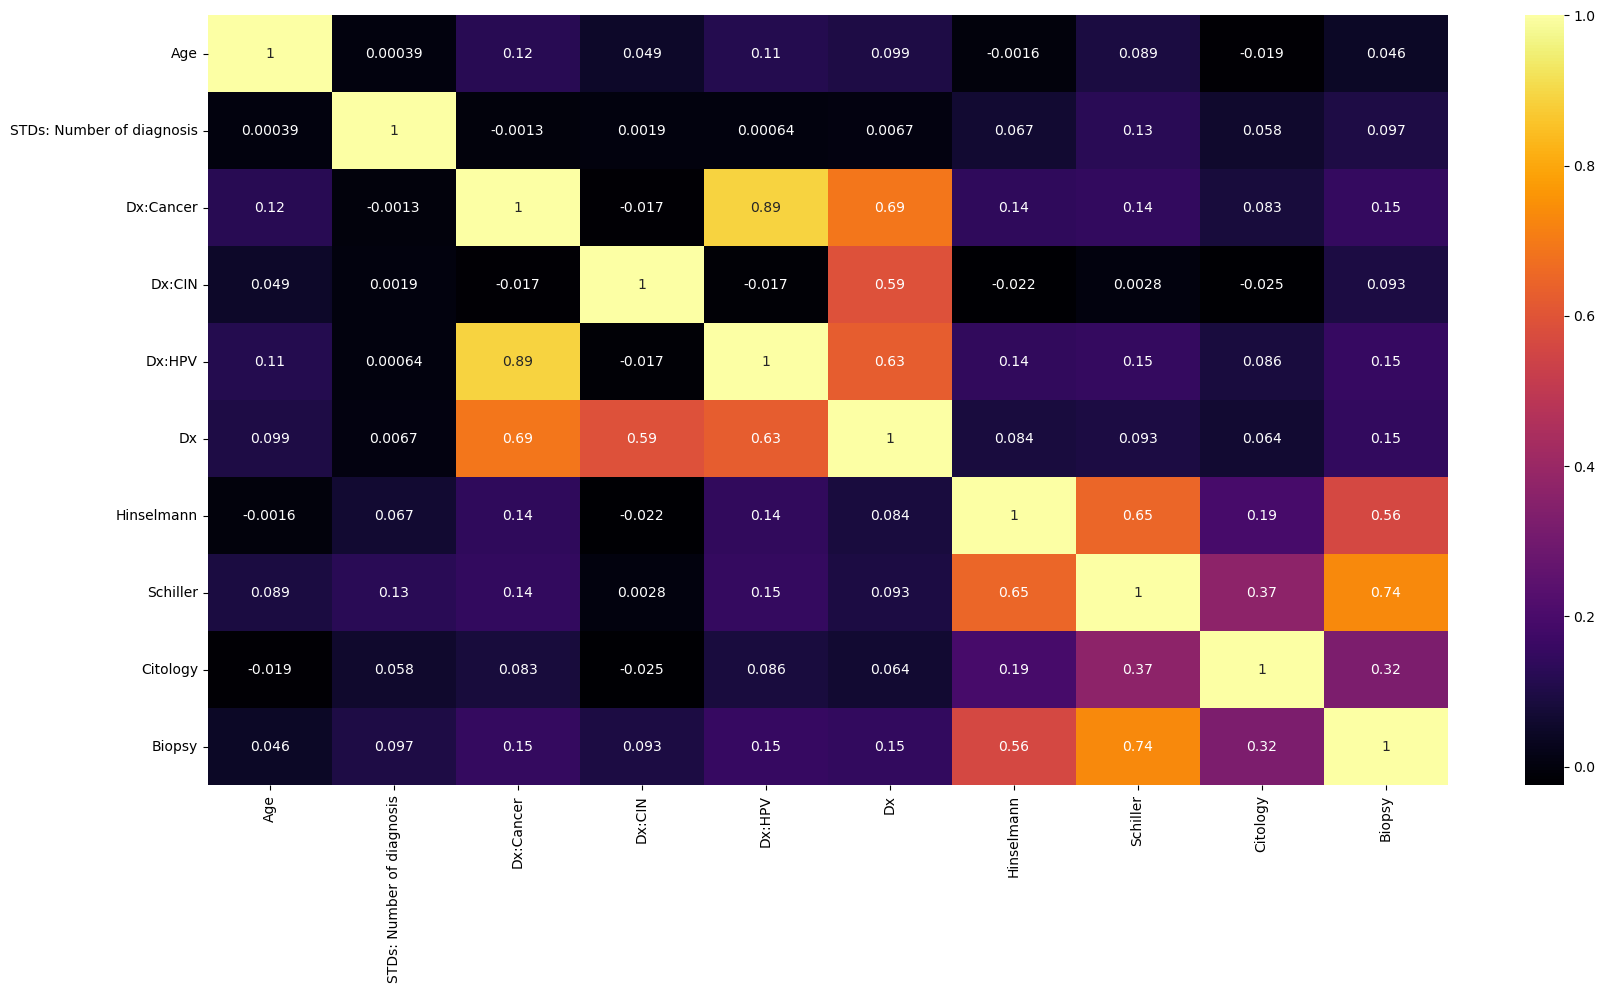

In [46]:
plt.figure(figsize = (20, 10))
sns.heatmap(Data_cor, 
            annot = True, 
            cmap = 'inferno')

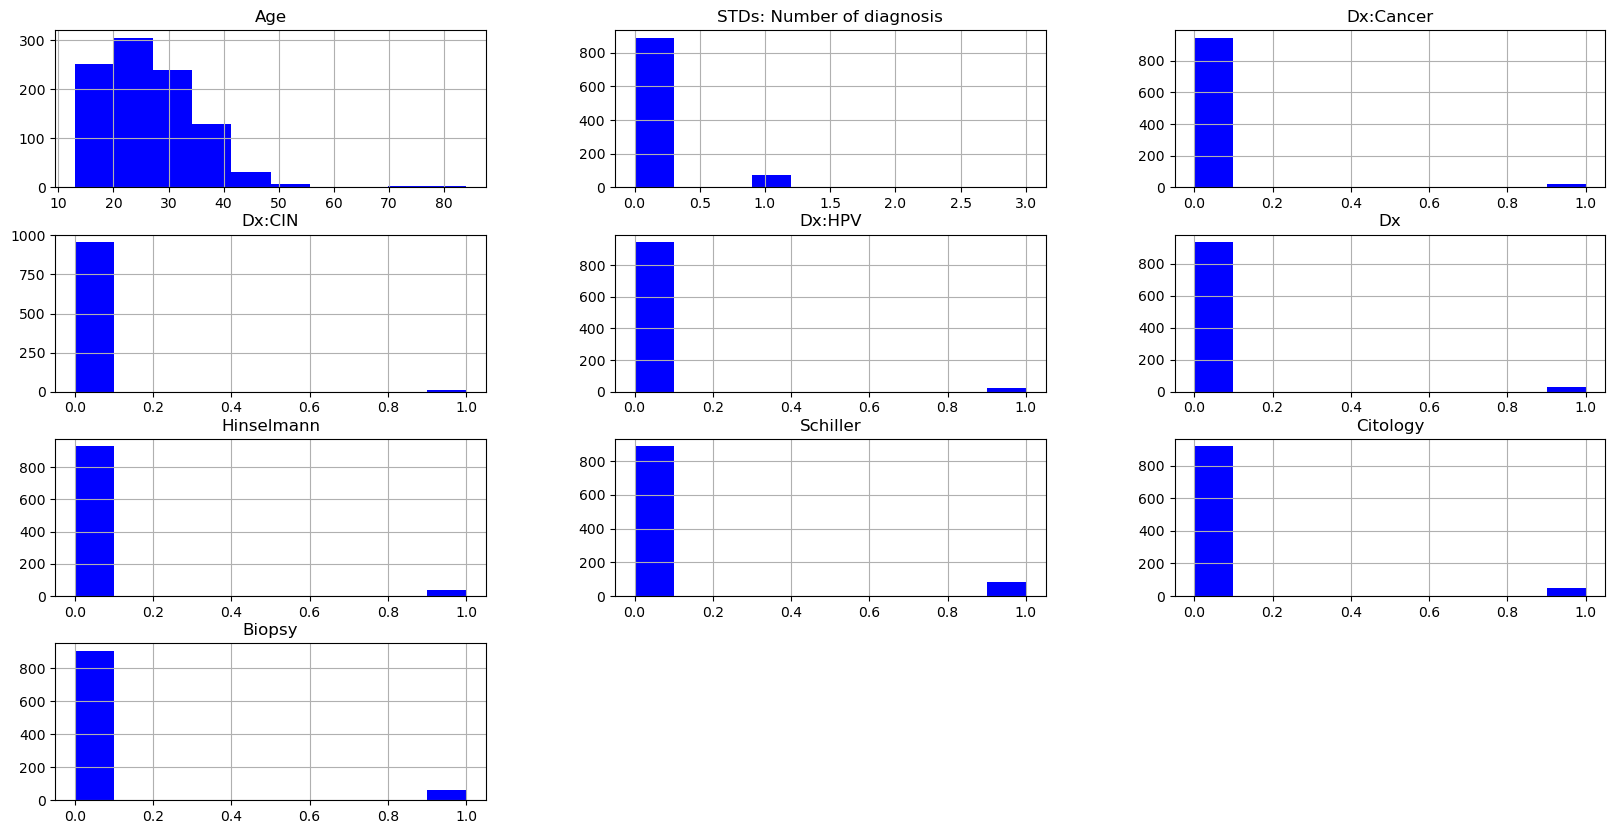

In [47]:
Data.hist(bins = 10, figsize = (20,10), color='blue')
plt.show()

## Correlation Dataframe :

In [55]:
Dataframe  = Data.drop('Biopsy', axis = 1)

In [56]:
Dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4,15,1,0,0,0,0,0,0,...,0,?,?,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,?,?,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,0,?,?,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,?,?,1,0,1,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,?,?,0,0,0,0,0,0,0


C:\Users\HP\AppData\Local\Temp\ipykernel_14456\877216408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Dataframe.corrwith(Data['Biopsy']).plot.bar(


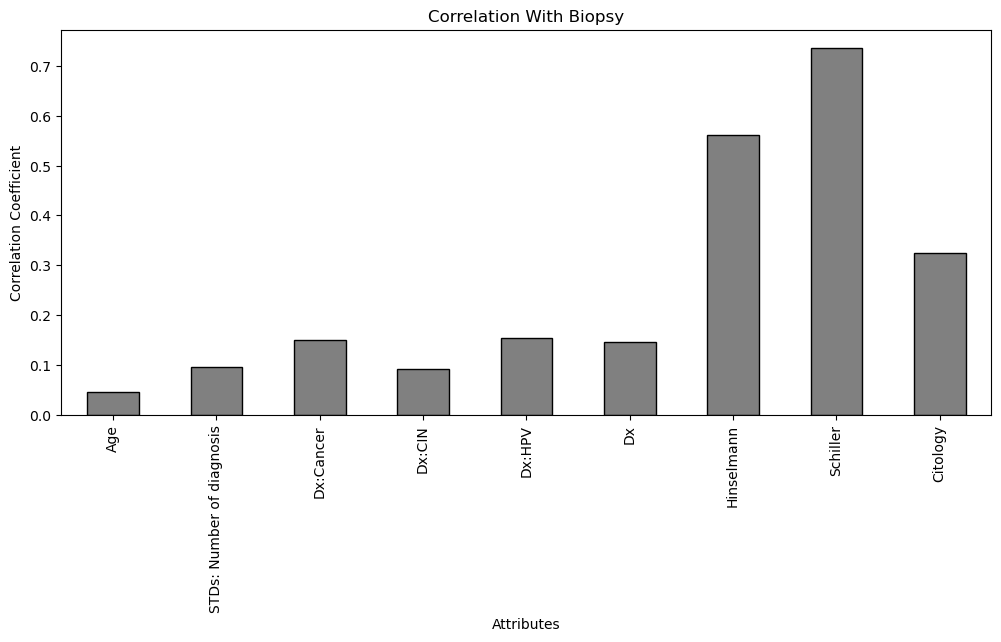

In [60]:
plt.figure(figsize=(12, 5))
Dataframe.corrwith(Data['Biopsy']).plot.bar(
    title='Correlation With Biopsy',
    color='grey',  # You can choose any color you prefer
    edgecolor='black',  # Adding black borders for better visibility
)
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.show()